In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.datasets import make_blobs
from sklearn import preprocessing

path = Path.cwd()

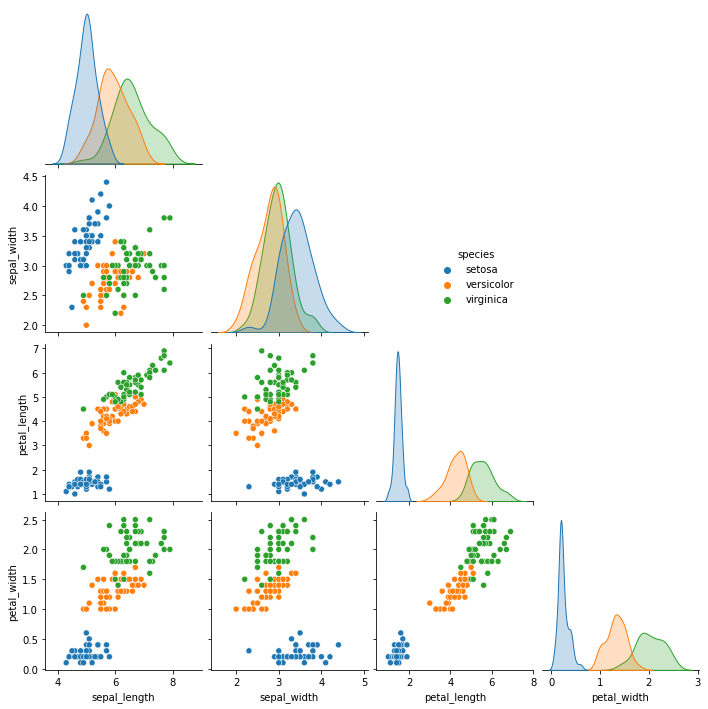

In [2]:
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue='species', corner=True)
g._legend.set_bbox_to_anchor((0.65, 0.6))
plt.savefig(Path(path.parent, 'iris.png'))

In [3]:
iris.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

## Dermatology

In [4]:
df = pd.read_csv('dermatology.data', header=None, na_values='?')

In [5]:
df[34].astype(str).value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: 34, dtype: int64

## Blobs

In [6]:
m = 1000
n = 5
k = 6

X, y, center = make_blobs(
    n_samples=m,
    n_features=n,
    centers=k,
    cluster_std=0.45,
    random_state=12022, return_centers=True
)
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [7]:
df = pd.DataFrame(X_scaled)
df['center'] = y

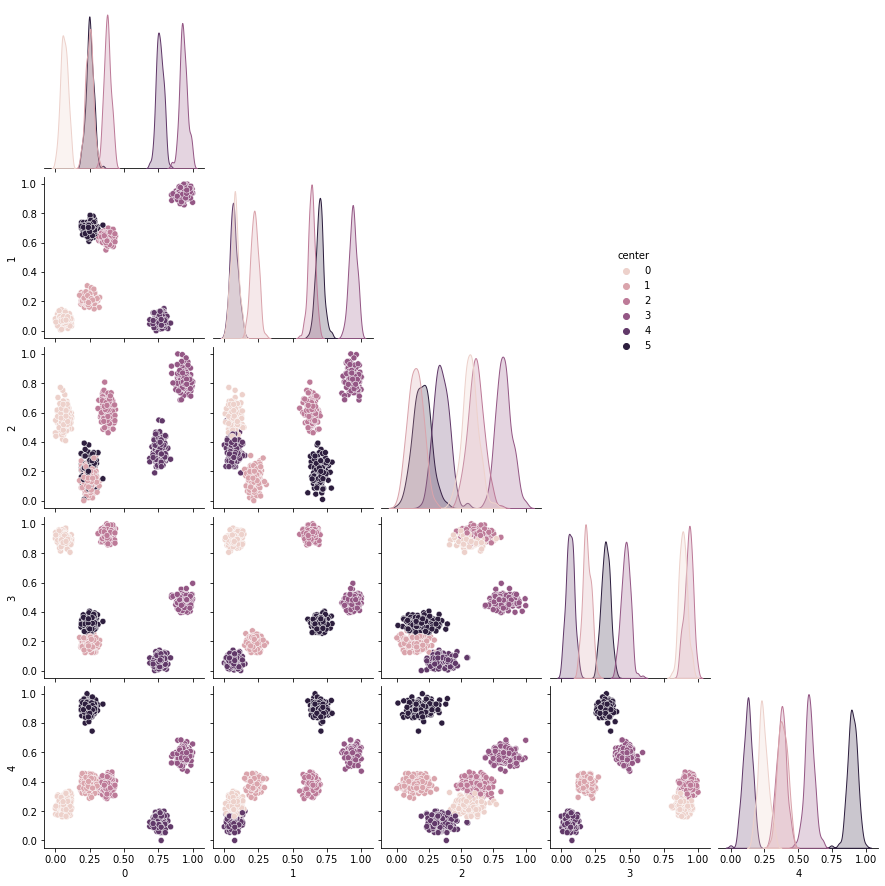

In [8]:
g = sns.pairplot(df, hue='center', corner=True)
g._legend.set_bbox_to_anchor((0.7, 0.65))
plt.savefig(Path(path.parent, 'blobs.png'))

In [9]:
np.set_printoptions(threshold=np.inf)

In [10]:
with open(Path(path.parent, 'LinearProblem', 'blob.dat'), '+w') as f:
    f.write(f'm = {m};\nn = {n};\nk = {k};\n\n')
    f.write(f'A = \n{np.around(X_scaled,3)};')

In [11]:
with open(Path(path.parent, 'Heuristics', 'blob.dat'), '+w') as f:
    f.write(f'm = {m};\nn = {n};\nk = {k};\n\n')
    f.write(f'A = \n{np.around(X_scaled,3)};')